# Image Augmentation Examples

This notebook demonstrates image augmentation capabilities within the Datasets package. Example using segmentation masks relies on the [Montgomery County Image Dataset](https://lhncbc.nlm.nih.gov/publication/pub9931). To run this notebook verbatim, follow the steps below to download and extract the necessary data (~600MB).

In [1]:
#!wget http://openi.nlm.nih.gov/imgs/collections/NLM-MontgomeryCXRSet.zip
#!unzip NLM-MontgomeryCXRSet.zip

## Crop Images to Mask

In [2]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from functools import partial

from datasets import TFImageDataset
from datasets.preprocessing import preprocess_uint16_input_inceptionv3
from datasets.io import read_png_uint8
from datasets.augmentation import crop_image_to_mask

%config InlineBackend.figure_format = 'retina'

In [3]:
image_paths = glob.glob('MontgomerySet/CXR_png/*.png')
mask_paths = glob.glob('MontgomerySet/ManualMask/leftMask/*.png')

In [4]:
dataset = pd.DataFrame({'image_paths': image_paths, 'mask_paths': mask_paths})

In [5]:
def read_multi_input_png_uint8(paths):
    image = read_png_uint8(paths['image_paths'])
    masks = read_png_uint8(paths['mask_paths'])
    return (image, masks)

In [6]:
def augment(ds):
    image = crop_image_to_mask(ds, img_key='image_paths', mask_key='mask_paths')
    return image

In [7]:
generator = TFImageDataset(read_function=read_multi_input_png_uint8,
                           augmentation_function=augment)

In [8]:
aug = generator.flow_from_dataframe(dataset,
                              x_col=['image_paths', 'mask_paths'],
                              class_mode=None, batch_size=32, target_size=(1024, 1024))

Missing images: 0


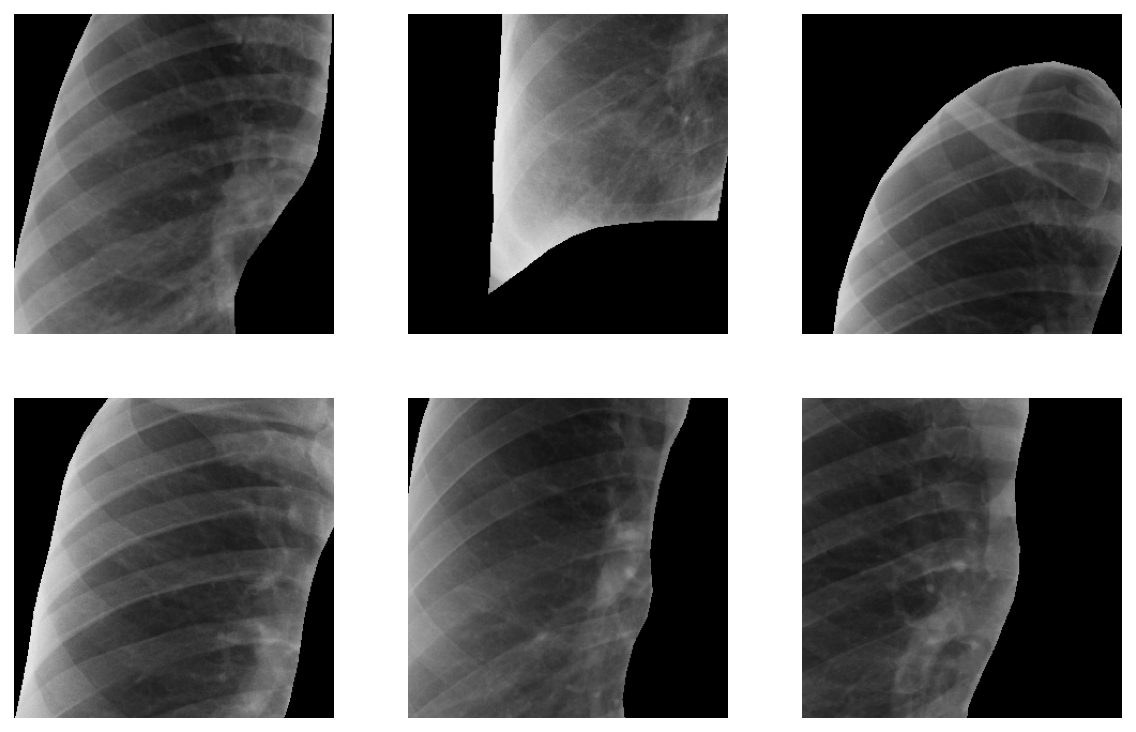

In [9]:
image_batch, label_batch = next(iter(aug))
plt.figure(figsize=(10, 10))
for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.axis("off")